# Synthetic Data

## Problem 1
Here is the Python code to create a matrix $A \in \mathbb{R}^{3 \times 2}$ 
whose individual entires are drawn from a Gaussian distribution with mean 0 and 
variance 1 in an iid fashion. 

In [6]:
import numpy as np
A = np.random.normal(0, 1, (3, 2))
print A

[[-0.51410192  0.25291884]
 [-0.75650342  0.21428801]
 [ 1.7665563   0.64679472]]


In [7]:
print np.linalg.matrix_rank(A)

2


Matrices with iid Gaussian entries are always full rank. Here, the rank is 2.

# Generation of Dataset 1

## Problem 1
Here is the generation of 500 data samples $X = \{x_i = Av_i\}_{i = 1}^{500}$ using the mathematical model that each $v_i \in \mathbb{R}^2$ is a random vector whose entries are iid Gaussian with mean 0 and variance 1. Note that the dimensionality of $X$ confirms my expectations. Furthermore, we can verify as well that the matrix has rank 2.

In [8]:
N = 500
X = np.concatenate([np.matmul(A, np.random.normal(0, 1, (2, 1))) for i in range(N)], axis = 1)
print X.shape

(3L, 500L)


In [9]:
print np.linalg.matrix_rank(X)

2


# Singular Value and Eigenvalue Decomposition of Dataset 1

## Problem 1
Here is the computation of the SVD of $X$ and the EV decomposition of $XX^T$ and my verification that 

1. The left singular vectors of $X$ correspond to the eigenvectors of $XX^T$.
2. The eigenvalues of $XX^T$ are the square of the singular values of $X$.
3. The energy in $X$ is equal to the sum of the squares of the singular values of $X$.

In [10]:
# Calculation of the SVD of X and the EVD of XX^T
U, S, Vt = np.linalg.svd(X)
D, E = np.linalg.eig(np.matmul(X, X.transpose()))

In [11]:
# Verification of condition 1 -- note that each column of U has a corresponding column in E.
print "Left singular vectors of X = "
print U
print "Eigenvectors of XX^T = "
print E

Left singular vectors of X = 
[[-0.22378601 -0.6316561   0.74224686]
 [-0.34418257 -0.66127751 -0.66652113]
 [ 0.91184329 -0.40462653 -0.06942037]]
Eigenvectors of XX^T = 
[[-0.22378601 -0.74224686  0.6316561 ]
 [-0.34418257  0.66652113  0.66127751]
 [ 0.91184329  0.06942037  0.40462653]]


In [12]:
# Verification of condition 2:
# Note that the -3.26849658e-13 and 2.45239578e-29 are likely due to the 
# propogation of error when doing numerical computation on a computer 
# (they are both basically 0), and one
# is negative and the other is positive to account for the 
# negative/positive difference in a pair of vectors
# above.
print "Eigenvalues of XX^T = "
print D
print "Singular values of X = "
print S
print "Square of the singular values of X = "
print np.square(S)

Eigenvalues of XX^T = 
[1.97894300e+03 2.76420593e-13 1.86974159e+02]
Singular values of X = 
[4.44853121e+01 1.36738494e+01 2.13364335e-15]
Square of the singular values of X = 
[1.97894300e+03 1.86974159e+02 4.55243393e-30]


In [13]:
# Verification of condition 3:
print "Energy of X = {}".format( np.square(np.linalg.norm(X)) )
print "Sum of the squares of the singular values of X = {}".format( sum([np.square(sigma) for sigma in S]) )

Energy of X = 2165.91715379
Sum of the squares of the singular values of X = 2165.91715379


## Problem 2
None of the singular values are exactly zero, but one of them is very close to zero (4.95e-15). None of my singular values are zero because of the propogation of error when doing numerical computations on a computer.



In [14]:
print A

[[-0.51410192  0.25291884]
 [-0.75650342  0.21428801]
 [ 1.7665563   0.64679472]]


In [15]:
print S

[4.44853121e+01 1.36738494e+01 2.13364335e-15]


In [16]:
print U

[[-0.22378601 -0.6316561   0.74224686]
 [-0.34418257 -0.66127751 -0.66652113]
 [ 0.91184329 -0.40462653 -0.06942037]]


We know that the left singular values of $X$ corresponding to the two largest singular values are also eigenvalues of $XX^T$, and we know that 

$$ 
XX^T = A(\sum_{i = 1}^{500}v_iv_i^T)A^T
$$

So the relationship between singular value $\sigma_j$, its singular vector $U_j$ and $A$ is:

$$
[A(\sum_{i = 1}^{500}v_iv_i^T)A^T]U_j = \sigma_j^2 U_j
$$

Also, the span of X is the span of A, so you only need to find the span of one of them.

# PCA of Dataset 1

## Problem 1
Since the original matrix was of rank 2, just having 2 principal components should suffice because the data originally had two dimensions of freedom, not three.

## Problem 2
Here is the proof that $E[x_k] = 0, k = 1, 2, 3$:
Each $x_k$ is an iid N(0, 1) random variable. Therefore, $E[x_k] = 0$ for $k = 1, 2, 3$.
Here is the computation of the mean vector. As we can see, the values are all close to 0.

In [17]:
m = np.mean(X, axis = 1)
print m

[-0.0724277  -0.10107493  0.1960425 ]


## Problem 3
The top two principal components are the columns of the below matrix:

In [21]:
U_p = U[:, 0:2]
print U_p

[[-0.22378601 -0.6316561 ]
 [-0.34418257 -0.66127751]
 [ 0.91184329 -0.40462653]]


## Problem 4
Here is the calculation and the representation error:

In [25]:
# Using the formula X_tilde = U* X
Xapprox = np.matmul(U_p.T, X)
print Xapprox.shape
Xreconst = np.matmul(U_p, Xapprox)
print Xreconst.shape

(2L, 500L)
(3L, 500L)


In [27]:
repError1 = np.square(np.linalg.norm(Xreconst - X))
print "The rep. error is {}".format(repError1)

The rep. error is 1.55580027396e-28


## Problem 5
Here is the calculation and the representation error:

In [43]:
# This is the first principal component
U1 = U[:, [0]]
print U1

[[-0.22378601]
 [-0.34418257]
 [ 0.91184329]]


In [44]:
# Using the formula X_tilde = U* X
Xapprox2 = np.matmul(U1.T, X)
print Xapprox2.shape
Xreconst2 = np.matmul(U1, Xapprox2)
print Xreconst2.shape

(1L, 500L)
(3L, 500L)


In [46]:
repError2 = np.square(np.linalg.norm(Xreconst2 - X))
secondLargestSV = np.square(S[1])
print S
print "The rep. error is {}".format(repError2)
print "The square of the second largest singular value is {}".format(secondLargestSV)
print "(These two are equal)"

[4.44853121e+01 1.36738494e+01 2.13364335e-15]
The rep. error is 186.974158657
The square of the second largest singular value is 186.974158657
(These two are equal)


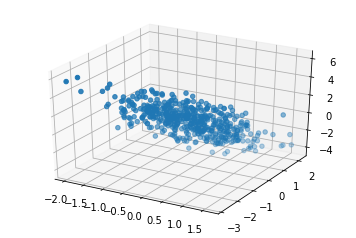

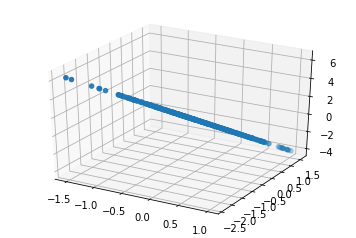

In [57]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(X[0], X[1], X[2])

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(Xreconst2[0], Xreconst2[1], Xreconst2[2])

# Generation of Dataset 2
## Problem 1
Here is the generation of c:

In [117]:
c = np.random.normal(0, np.sqrt(3), (3, 1))
print c

[[ 2.31112705]
 [-1.62754727]
 [-1.14720597]]


## Problem 2
Here is the generation of the 500 data samples:

In [118]:
N = 500
X = np.concatenate([np.matmul(A, np.random.normal(0, 1, (2, 1))) + c for i in range(N)], axis = 1)
print X.shape

(3L, 500L)


In [119]:
print np.linalg.matrix_rank(X)

3


# PCA, Centering and Dataset 2

Here are the top two principal components of dataset 2 without centering the data

In [120]:
U, S, Vt = np.linalg.svd(X)
U_p = U[:, 0:2]
print U_p

[[-0.71201925  0.24170533]
 [ 0.35096114 -0.6906818 ]
 [ 0.60815695  0.68156965]]


In [125]:
Xreconst = np.matmul(U_p, np.matmul(U_p.T, X))
print Xreconst.shape

(3L, 500L)


In [122]:
repError1 = np.square(np.linalg.norm(Xreconst - X))
print "The rep. error is {}".format(repError1)

The rep. error is 187.010964248


The representation error is nowhere nere zero because we didn't preprocess the data.

In [140]:
# Calculate the means
m = np.matrix(np.mean(X, axis = 1)).T
print m

[[ 2.36656448]
 [-1.53585409]
 [-1.43483311]]


In [145]:
N = 500
mMatrix = np.concatenate([m for i in range(N)], axis = 1)
Xcentered = X - mMatrix
print Xcentered.shape
U, S, Vt = np.linalg.svd(Xcentered)
U_p = U[:, 0:2]
Xreconst2 = np.matmul(U_p, np.matmul(U_p.T, Xcentered)) + mMatrix
print Xreconst2.shape

(3L, 500L)
(3L, 500L)


In [146]:
repError2 = np.square(np.linalg.norm(Xreconst2 - X))
print "The rep. error is {}".format(repError2)

The rep. error is 1.68729952056e-28


Having dealt with centered data, the representation error is now very close to zero!

# Generation of Dataset 3
## Problem 1
Here is the generation of the 500 data samples using the mathematical model.

In [158]:
N = 500
X = np.concatenate([np.matmul(A, np.random.normal(0, 1, (2, 1))) + np.random.normal(0, np.sqrt(0.01), (3, 1)) for i in range(N)], axis = 1)
print X.shape

(3L, 500L)


Here is the normalized version of X

In [159]:
Xt = X.T
for row in X.T:
    row /= np.linalg.norm(row)
Xnorm = Xt.T
print Xnorm.shape

(3L, 500L)


In [161]:
print "The rank of the normalized data matrix is {}".format(np.linalg.matrix_rank(Xnorm))
U, S, Vt = np.linalg.svd(Xnorm)
print "The singular values of X are {}".format(S)

The rank of the normalized data matrix is 3
The singular values of X are [19.53097858 10.44535163  3.07172674]


# PCA Denoising of Dataset 3
## Problem 1
Here is the 3d scatterplot of the normalized data samples.

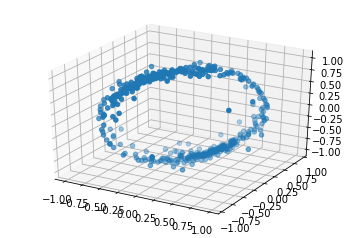

In [162]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(Xnorm[0], Xnorm[1], Xnorm[2])

## Problem 2
Here is the denoising of the data sample:

In [165]:
U_p = U[:, 0:2]
print U_p

[[-0.20399188 -0.67263196]
 [-0.31572965 -0.64255509]
 [ 0.92666181 -0.36700029]]


In [166]:
Xreconst = np.matmul(U_p, np.matmul(U_p.T, Xnorm))
print Xreconst.shape

(3L, 500L)


## Problem 3
Here is the scatterplot corresponding to the denoised data samples.

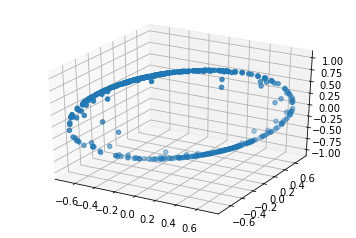

In [167]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(Xreconst[0], Xreconst[1], Xreconst[2])

## Problem 4
Here is the verification that the representation error and between the normalized matrix and the denoised version is the square of the third singular value of X.

In [170]:
repError = np.square(np.linalg.norm(Xreconst - Xnorm))
print "The rep. error is {}".format(repError)
print "The square of the third singular value of X is {}".format(np.square(S[2]))

The rep. error is 9.43550516247
The square of the third singular value of X is 9.43550516247


# Real Data
Here is the part where we work with real data!

## Problem 1
Here is the image as an 8x8 grayscale using pyplot

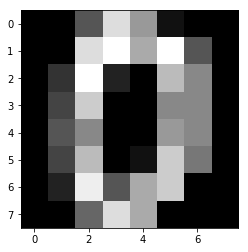

In [243]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y = True)
pic = np.reshape(images[0], (8, 8))
plt.imshow(pic,cmap='gray')

## Problem 2
Here is the mean vector

(178L, 64L)


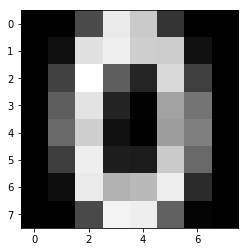

In [244]:
print images.shape
meanImages = np.reshape(np.mean(images, axis = 0), (8, 8))
plt.imshow(meanImages,cmap='gray')

## Problem 3
Here is the SVD of the mean centered data.

(64L, 64L)


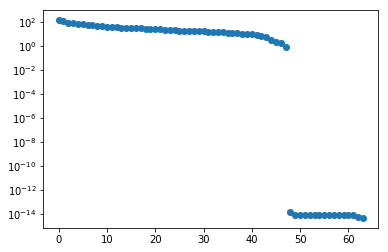

In [262]:
imagesCentered = images.T - np.reshape(meanImages, (64, 1))
U, S, Vt = np.linalg.svd(imagesCentered)
print U.shape
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.scatter(range(len(S)), S)

## Problem 4
Here is the calculation of k:

In [257]:
for k in range(len(S) + 1):
    currVal = sum([np.square(x) for x in S[:k]]) / np.square(np.linalg.norm(imagesCentered))
    if currVal >= 0.90: break
print "The lowest value of k that satisfies this is k = {}".format(k)

The lowest value of k that satisfies this is k = 18


(64L, 18L)


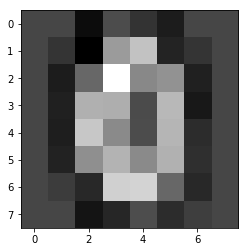

In [258]:
U_p = U.T[0:18].T
print U_p.shape
firstPrin = U_p[:, 0]
pic1 = np.reshape(firstPrin, (8,8))
plt.imshow(pic1, cmap='gray')

## Problem 5
Here is the problem to project each mean centered image onto the top thre principal components of X.

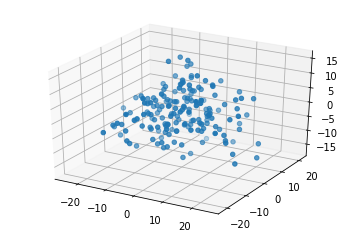

In [263]:
U_p = U.T[0:3].T
proj = np.matmul(U_p.T, imagesCentered)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proj[0], proj[1], proj[2])

In [268]:
# Here is the reconstruction of the original images:
picsReconstructed = np.matmul(U_p, proj)
repError = np.square(np.linalg.norm(picsReconstructed - imagesCentered))
print "The rep. error is {}".format(repError)
print "This is equal to the sum of the third to the last singular values squared, which is {}".format(sum([np.square(x) for x in S[3:]]))

The rep. error is 36050.0106057
This is equal to the sum of the third to the last singular values squared, which is 36050.0106057


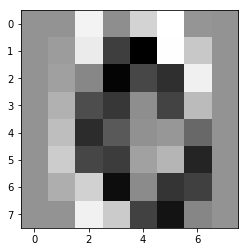

In [269]:
pic1Reconstructed = np.reshape(picsReconstructed.T[0], (8,8))
plt.imshow(pic1Reconstructed, cmap='gray')